In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

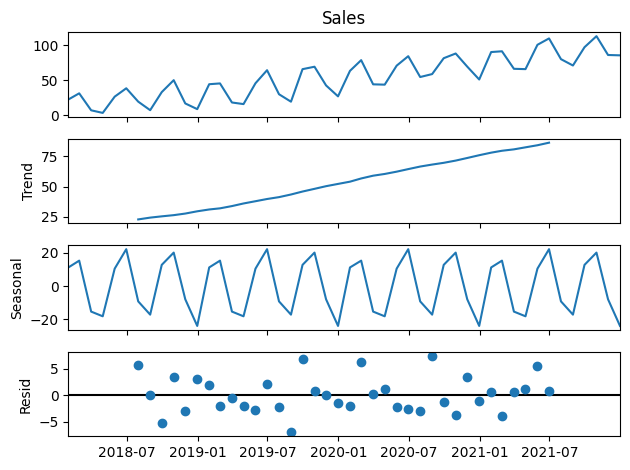

In [4]:
# Generate a date range
rng = pd.date_range(start='2018-01-01', periods=48, freq='M')

# Create a simple dataset: a trend component and a seasonal component
np.random.seed(42)  # For reproducibility
trend = np.linspace(start=10, stop=100, num=48)
seasonal = np.tile([10, 20, -10, -20], 12)  # Repeat this pattern each year
data = trend + seasonal + np.random.normal(scale=5, size=48)  # Add some noise

# Create a DataFrame
df = pd.DataFrame({'Sales': data}, index=rng)

# Decompose the time series
result = seasonal_decompose(df['Sales'], model='additive', period=12)

# Plot the decomposed components
result.plot()
plt.show()

Seasonal and Trend decomposition using Loess (STL)

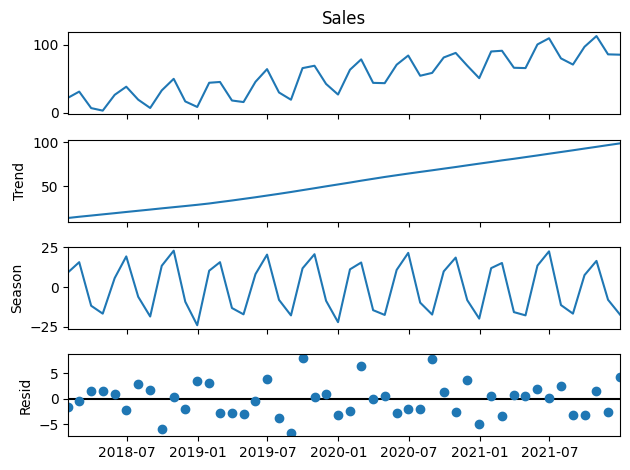

In [5]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl = STL(df['Sales'], seasonal=13, period=12)  # 'seasonal' can be adjusted based on your data
result = stl.fit()

# Plot the decomposed components
fig = result.plot()
plt.show()

How Loess - locally estimated scatterplot smoothing works:

- It's a technique used to create a smooth line through a scatterplot of data points
- Like drawing a line, that best fits through data, but instead of being straight it is flexible and can curve around to follow data more closely 
- Loess is useful becuase it can hanfle data the doesn't git neatly into a straight line or simple curve 
- It is good at showing the underlying trend in data when that trend is complex and changes in different parts of the data set

# Classical decomposition with multiplicative seasonality:

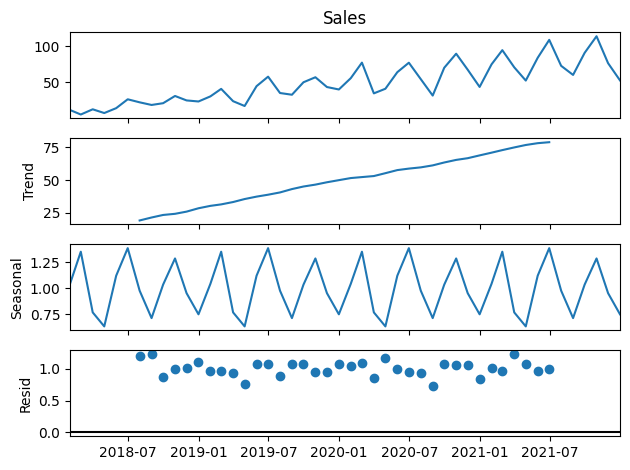

In [6]:
# For reproducibility we set the seed earlier 
trend = np.linspace(start=10, stop=100, num=48)
seasonal = np.array([1, 1.2, 0.8, 0.6, 1, 1.2, 0.8, 0.6, 1, 1.2, 0.8, 0.6] * 4)  # Seasonal pattern
data = trend * seasonal + np.random.normal(scale=5, size=48)  # Multiplicative model with noise

# Create a DataFrame
df = pd.DataFrame({'Sales': data}, index=rng)

# Decompose the time series using a multiplicative model
result = seasonal_decompose(df['Sales'], model='multiplicative', period=12)

# Plot the decomposed components
result.plot()
plt.show()